# IBM Telco Customer Churn Prediction

This notebook explores the prediction of customer churn for IBM’s Telco dataset. The workflow is structured into four main parts:

1. **Data Understanding:** We begin by examining the dataset to understand its structure, features, missing values, and the distribution of the target variable `Churn`. This step helps identify patterns, anomalies, and relationships that could impact model performance.

2. **Data Preprocessing:** We clean, encode, and scale the data as needed, handling categorical variables and preparing the dataset for modeling. For some models, we balance the data to address class imbalance, improving sensitivity to churn cases.

3. **Modeling:** We train four machine learning models: **XGBoost** and **Random Forest** on the imbalanced dataset, and **Support Vector Machine (SVM)** and **Logistic Regression** on a balanced dataset. This approach allows us to compare performance under different data conditions and algorithms.

4. **Evaluation:** Finally, we assess model performance using appropriate metrics to determine which approach best predicts customer churn and provides actionable insights for business decisions.

The dataset includes customer demographics, account information, and service usage data, with the `Churn` column indicating whether a customer has left the company (`Yes`) or stayed (`No`).



## Load packages

In [16]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
import xgboost as xgb



In [3]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 1. Data Understanding

Columns:


### 1. Dataset Overview

In [4]:
print("Dataset shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum().sum())

Dataset shape: (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 0


In [5]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].nunique()} unique values")

customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2. Target Variable (Churn Distribution)

C:\Users\sarah\AppData\Local\Temp\ipykernel_14416\1232359209.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




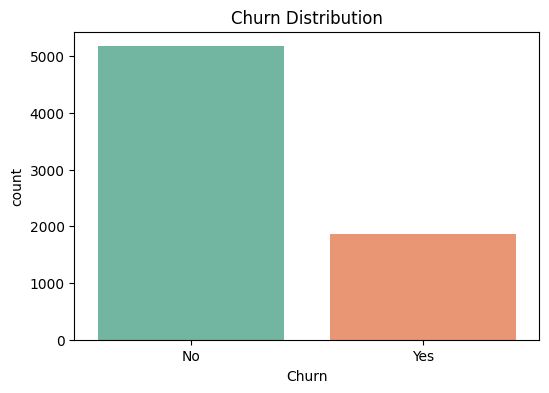

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title("Churn Distribution")
plt.show()

# Percentages
print(data['Churn'].value_counts(normalize=True) * 100)


### 4. Account Information

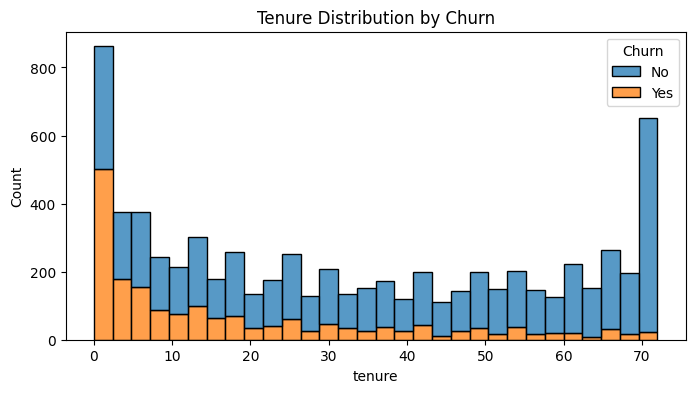

In [9]:
# Tenure distribution
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='tenure', bins=30, hue='Churn', multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.show()


### 7. Initial Insights (Compare Key Features)

C:\Users\sarah\AppData\Local\Temp\ipykernel_14416\2975770708.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sarah\AppData\Local\Temp\ipykernel_14416\2975770708.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




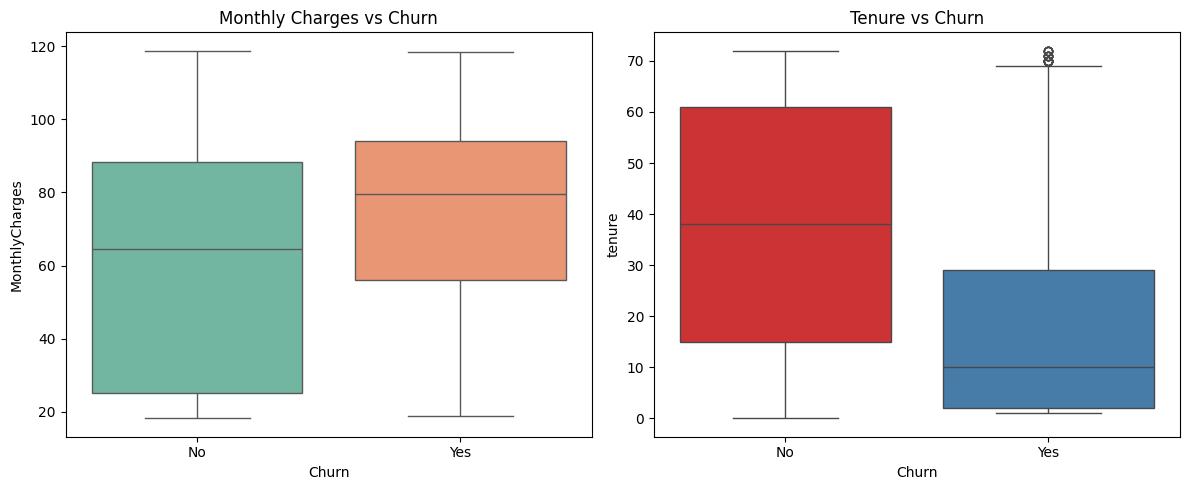

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Boxplot: Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2', ax=axes[0])
axes[0].set_title("Monthly Charges vs Churn")

# Boxplot: Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=data, palette='Set1', ax=axes[1])
axes[1].set_title("Tenure vs Churn")

plt.tight_layout()
plt.show()


more data visualization are in the notebook **'dataset-visualization'**

## 2. Preprocessing & Balancing
#### **Data Preprocessing Steps:**

* Drop irrelevant column: `customerID`.
* Convert `TotalCharges` to numeric and handle missing values.
* Encode target `Churn` as 0/1.
* Encode categorical features:

  * Binary (Yes/No → 0/1).
  * Multi-class (one-hot encoding).
* Scale numerical features: `tenure`, `MonthlyCharges`, `TotalCharges`.



In [11]:
# Missing values analysis
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
print("\nMissing Values :\n",total)
# Check for duplicates
print(data.duplicated().any())


Missing Values :
 customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64
False


In [12]:
#1. Drop Useless Columns
data = data.drop(['customerID'], axis=1)

#2.fix colomn types
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])

#3. Encode Target Variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

#4. Encode Categorical Features
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling',
               'MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# unify "No internet service" and "No phone service"
for col in binary_cols:
    data[col] = data[col].replace({'No internet service':'No', 'No phone service':'No'})

# map to 0/1
for col in binary_cols:
    data[col] = data[col].map({'Yes':1, 'No':0})

# gender to 0/1
data['gender'] = data['gender'].map({'Female':1, 'Male':0})

# Multi-class categories
data = pd.get_dummies(data, columns=['InternetService','Contract','PaymentMethod'], drop_first=True)


In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


**Scale Numerical Features :**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(
    data[['tenure','MonthlyCharges','TotalCharges']]
)


In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,0,0,1,0,...,-1.161694,-0.994194,0,False,False,False,False,False,True,False
1,0,0,0,0,0.064303,1,0,1,0,1,...,-0.260878,-0.173740,0,False,False,True,False,False,False,True
2,0,0,0,0,-1.239504,1,0,1,1,0,...,-0.363923,-0.959649,1,False,False,False,False,False,False,True
3,0,0,0,0,0.512486,0,0,1,0,1,...,-0.747850,-0.195248,0,False,False,True,False,False,False,False
4,1,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,True,False,False,False,False,True,False


#### **balencing the data**

In [28]:
#spliting the data 
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [18]:
#balencing the data 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
print(pd.Series(y_train_bal).value_counts())


Churn
1    3614
0    3614
Name: count, dtype: int64


**Dataset is now clean, fully numeric, and ready for model training.**

## 3. Modeling


In this section, we will train and evaluate four machine learning models to predict customer churn. We will handle the data differently depending on the model’s sensitivity to class imbalance:

* **Random Forest** and **XGBoost** will be trained on the original imbalanced dataset, as these tree-based models can naturally handle skewed class distributions.
* **Logistic Regression** and **SVM** will be trained on a balanced version of the dataset using oversampling techniques (e.g., SMOTE), because these algorithms are sensitive to class imbalance and perform better when both classes are represented fairly.




In [19]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# RANDOM FOREST
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # optional class_weight
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.46      0.53       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110

ROC-AUC: 0.8142070843244277
Confusion Matrix:
 [[1399  150]
 [ 302  259]]


In [20]:
# XGBOOST
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                              random_state=42, scale_pos_weight=(y_train==0).sum()/(y_train==1).sum())
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Performance:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Performance:

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1549
           1       0.54      0.68      0.60       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.78      0.76      0.77      2110

ROC-AUC: 0.8105056565733283
Confusion Matrix:
 [[1229  320]
 [ 180  381]]


c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[17:03:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [21]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LOGISTIC REGRESSION
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_bal, y_train_bal)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1549
           1       0.52      0.73      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110

ROC-AUC: 0.8235840729859643
Confusion Matrix:
 [[1168  381]
 [ 154  407]]


In [22]:
# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_bal, y_train_bal)

y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

print("\nSVM Performance:\n")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Performance:

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1549
           1       0.51      0.72      0.60       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.78      0.74      0.76      2110

ROC-AUC: 0.8108992173663879
Confusion Matrix:
 [[1166  383]
 [ 157  404]]


* we will tray to train the balenced data with xgboost and random forest 

In [23]:
# RANDOM FOREST with balanced data
rf_model_b = RandomForestClassifier(random_state=42, class_weight='balanced')  # optional class_weight
rf_model_b.fit(X_train_bal, y_train_bal)

y_pred_rf_b = rf_model_b.predict(X_test)
y_prob_rf_b= rf_model_b.predict_proba(X_test)[:, 1]

print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf_b))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_b))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_b))


Random Forest Performance:

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.55      0.63      0.59       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.78      0.76      0.77      2110

ROC-AUC: 0.8042742773498859
Confusion Matrix:
 [[1263  286]
 [ 210  351]]


In [24]:
# XGBOOST with balanced data
xgb_model_b = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                              random_state=42, scale_pos_weight=(y_train_bal==0).sum()/(y_train_bal==1).sum())
xgb_model_b.fit(X_train_bal, y_train_bal)

y_pred_xgb_b = xgb_model_b.predict(X_test)
y_prob_xgb_b = xgb_model_b.predict_proba(X_test)[:, 1]

print("\nXGBoost Performance:\n")
print(classification_report(y_test, y_pred_xgb_b))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb_b))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_b))


XGBoost Performance:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.54      0.63      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.76      0.76      2110

ROC-AUC: 0.8045176636298043
Confusion Matrix:
 [[1245  304]
 [ 205  356]]


c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[17:14:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




## 4. Evaluation & Results

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [46]:
models = {
    'Logistic Regression': y_pred_lr,
    'svm': y_pred_svm,
    'Random Forest imbalence': y_pred_rf,
    'XGBoost imbalence': y_pred_xgb,
    'Random Forest balence': y_pred_rf_b,
    'XGBoost balence': y_pred_xgb_b
}

precision, recall, f1, roc_auc = [], [], [], []

for name, y_pred in models.items():
    # Precision, Recall, F1 for fraud class (class 1)
    precision.append(precision_score(y_test, y_pred, pos_label=1))
    recall.append(recall_score(y_test, y_pred, pos_label=1))
    f1.append(f1_score(y_test, y_pred, pos_label=1))
    
    # ROC-AUC using predicted probabilities
    if name == 'Logistic Regression':
        y_proba = lr_model.predict_proba(X_test)[:,1]
    elif name == 'svm':
        y_proba = svm_model.predict_proba(X_test)[:,1]    
    elif name == 'Random Forest':
        y_proba = rf_model.predict_proba(X_test)[:,1]
    elif name == 'Random Forest balence':
        y_proba = rf_model_b.predict_proba(X_test)[:,1]
    elif name == 'XGBoost balence':
        y_proba = xgb_model_b.predict_proba(X_test)[:,1]        
    else:  # XGBoost
        y_proba = xgb_model.predict_proba(X_test)[:,1]
    
    roc_auc.append(roc_auc_score(y_test, y_proba))



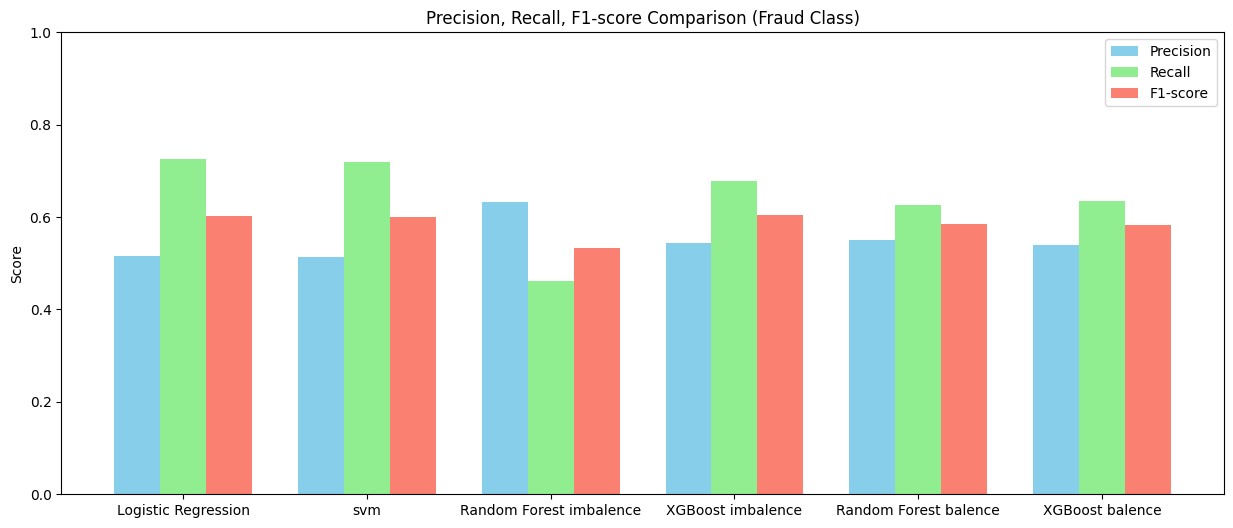

In [36]:
x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(15,6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-score', color='salmon')
plt.xticks(x, models)
plt.ylim(0,1)
plt.title('Precision, Recall, F1-score Comparison (Fraud Class)')
plt.ylabel('Score')
plt.legend()
plt.show()

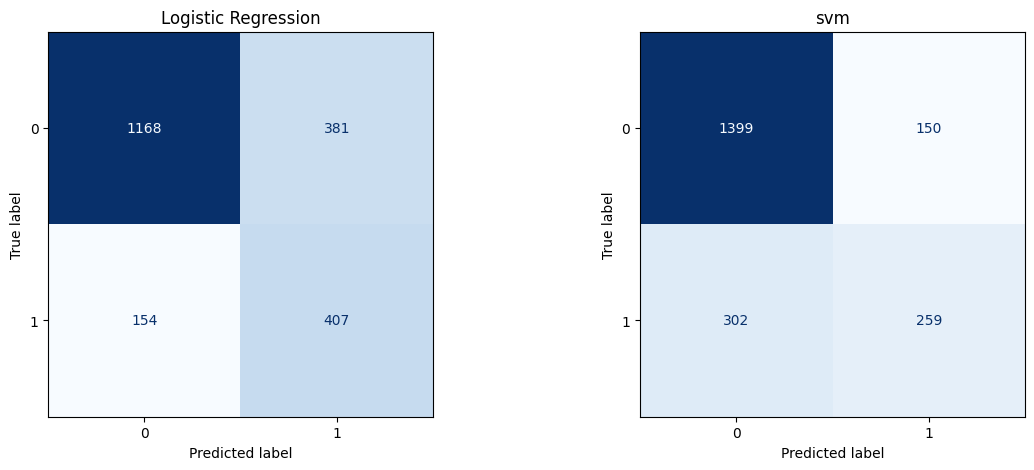

In [44]:
# ===== 3. Optional: Confusion Matrices Side by Side =====
from sklearn.metrics import ConfusionMatrixDisplay

# Suppose y_pred_lr, y_pred_rf, y_pred_xgb exist
fig, axes = plt.subplots(1,2, figsize=(14,5))
for ax, y_pred, name in zip(axes, [y_pred_lr, y_pred_rf, y_pred_xgb], models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)
plt.show()

**🔹 Key Observations**

Balancing helps Random Forest detect churners better (F1 0.59 vs 0.53) but slightly lowers overall accuracy.

Balancing slightly hurts XGBoost performance on churn detection and ROC-AUC, showing XGBoost is robust to imbalance.

Imbalanced XGBoost is still better at catching churners than balanced XGBoost, with fewer false negatives.

ROC-AUC favors imbalanced Random Forest and XGBoost slightly over their balanced counterparts.

## Conclusion

This analysis of IBM Telco's customer churn data demonstrates the importance of both data preprocessing and model selection in predicting churn effectively. Key findings include:
- **Balancing the dataset** improves the ability of models like Random Forest and Logistic Regression to detect churners, increasing recall and F1-score for the minority class, though sometimes at the cost of overall accuracy.
- **XGBoost** shows strong robustness to class imbalance, maintaining high performance even without balancing, and generally achieves the best ROC-AUC and churn detection rates.
- **Random Forest** benefits from balancing, with improved detection of churners, but its overall performance is slightly lower than XGBoost.
- **Logistic Regression and SVM** require balanced data to perform well, highlighting the need for careful preprocessing when using these algorithms.

**Business Implications:**
- Focusing on features such as tenure, monthly charges, and contract type can help identify customers at risk of churning.
- Using robust models like XGBoost enables the business to proactively target likely churners, potentially reducing customer loss and increasing retention.
- Regularly updating and retraining models with new data will ensure continued accuracy and relevance of churn predictions.

Overall, a combination of proper data handling and advanced machine learning models provides actionable insights for reducing churn and improving customer satisfaction.